# Read Dataset

In [47]:
import pandas as pd

# Read CSV files
policies_df = pd.read_csv("/content/drive/MyDrive/pak_claims_data.csv")
queries_df = pd.read_csv("/content/drive/MyDrive/pak_customer_queries.csv")
claims_df = pd.read_csv("/content/drive/MyDrive/pak_insurance_policies.csv")

# View the first few rows of each
print("Policies:")
print(policies_df.shape)

print("\nCustomer Queries:")
print(queries_df.shape)

print("\nClaims:")
print(claims_df.shape)


Policies:
(1500, 8)

Customer Queries:
(1500, 7)

Claims:
(1500, 13)


In [48]:
# View the first few rows of each
print("Policies:")
print(policies_df.columns)

print("\nCustomer Queries:")
print(queries_df.columns)

print("\nClaims:")
print(claims_df.columns)


Policies:
Index(['claim_id', 'policy_id', 'claim_date', 'claim_amount', 'claim_reason',
       'status', 'rejection_reason', 'documents_attached'],
      dtype='object')

Customer Queries:
Index(['query_id', 'customer_id', 'query_date', 'topic', 'message', 'resolved',
       'escalated'],
      dtype='object')

Claims:
Index(['policy_id', 'customer_id', 'customer_name', 'cnic', 'city', 'phone',
       'policy_type', 'insurance_company', 'coverage_amount', 'premium',
       'start_date', 'end_date', 'status'],
      dtype='object')


In [49]:
print("Policies:")
policies_df.info()

Policies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   claim_id            1500 non-null   object
 1   policy_id           1500 non-null   object
 2   claim_date          1500 non-null   object
 3   claim_amount        1500 non-null   int64 
 4   claim_reason        1500 non-null   object
 5   status              1500 non-null   object
 6   rejection_reason    511 non-null    object
 7   documents_attached  1500 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 83.6+ KB


In [50]:
print("\nCustomer Queries:")
print(queries_df.info())


Customer Queries:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   query_id     1500 non-null   object
 1   customer_id  1500 non-null   object
 2   query_date   1500 non-null   object
 3   topic        1500 non-null   object
 4   message      1500 non-null   object
 5   resolved     1500 non-null   bool  
 6   escalated    1500 non-null   bool  
dtypes: bool(2), object(5)
memory usage: 61.7+ KB
None


In [51]:
print("\nClaims:")
print(claims_df.info())


Claims:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   policy_id          1500 non-null   object
 1   customer_id        1500 non-null   object
 2   customer_name      1500 non-null   object
 3   cnic               1500 non-null   object
 4   city               1500 non-null   object
 5   phone              1500 non-null   int64 
 6   policy_type        1500 non-null   object
 7   insurance_company  1500 non-null   object
 8   coverage_amount    1500 non-null   int64 
 9   premium            1500 non-null   int64 
 10  start_date         1500 non-null   object
 11  end_date           1500 non-null   object
 12  status             1500 non-null   object
dtypes: int64(3), object(10)
memory usage: 152.5+ KB
None


<ipython-input-52-51ee5ddf581e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, x='Number of Columns', y='Dataset', palette=palette)


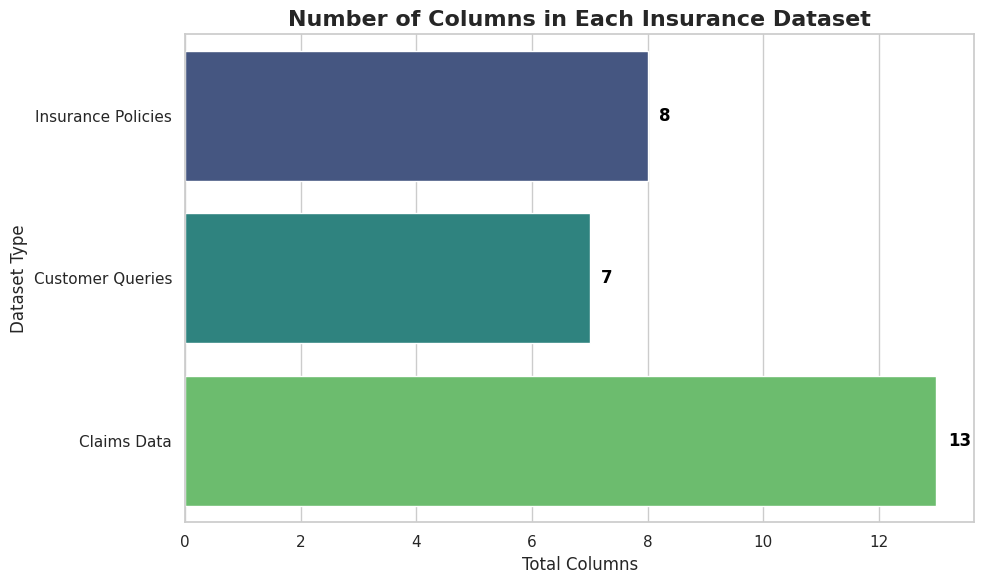

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
datasets = {
    'Insurance Policies': len(policies_df.columns),
    'Customer Queries': len(queries_df.columns),
    'Claims Data': len(claims_df.columns)
}

# Convert to DataFrame for Seaborn
df = pd.DataFrame(list(datasets.items()), columns=['Dataset', 'Number of Columns'])

# Set style
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(df))

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Number of Columns', y='Dataset', palette=palette)

# Add annotations
for i, (value, name) in enumerate(zip(df['Number of Columns'], df['Dataset'])):
    barplot.text(value + 0.2, i, str(value), color='black', va="center", fontweight='bold')

# Titles and layout
plt.title("Number of Columns in Each Insurance Dataset", fontsize=16, fontweight='bold')
plt.xlabel("Total Columns")
plt.ylabel("Dataset Type")
plt.tight_layout()
plt.show()


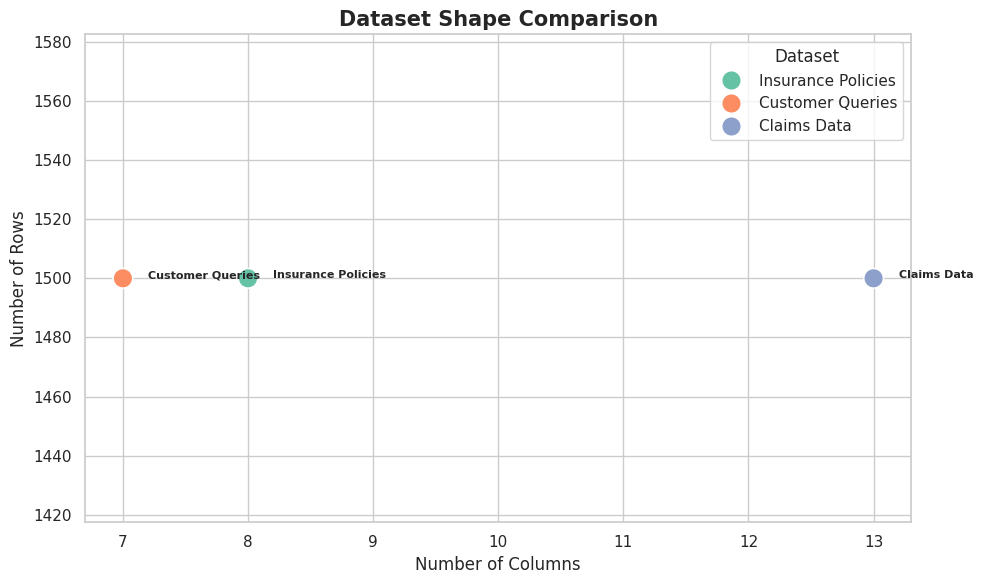

In [53]:
# Prepare shapes
shapes = {
    "Insurance Policies": policies_df.shape,
    "Customer Queries": queries_df.shape,
    "Claims Data": claims_df.shape
}

# Convert to DataFrame
shape_df = pd.DataFrame([
    {"Dataset": k, "Rows": v[0], "Columns": v[1]} for k, v in shapes.items()
])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shape_df, x="Columns", y="Rows", hue="Dataset", s=200, palette="Set2")
for _, row in shape_df.iterrows():
    plt.text(row['Columns'] + 0.2, row['Rows'], f"{row['Dataset']}", fontsize=8, weight='bold')

plt.title("Dataset Shape Comparison", fontsize=15, weight='bold')
plt.xlabel("Number of Columns")
plt.ylabel("Number of Rows")
plt.grid(True)
plt.tight_layout()
plt.show()


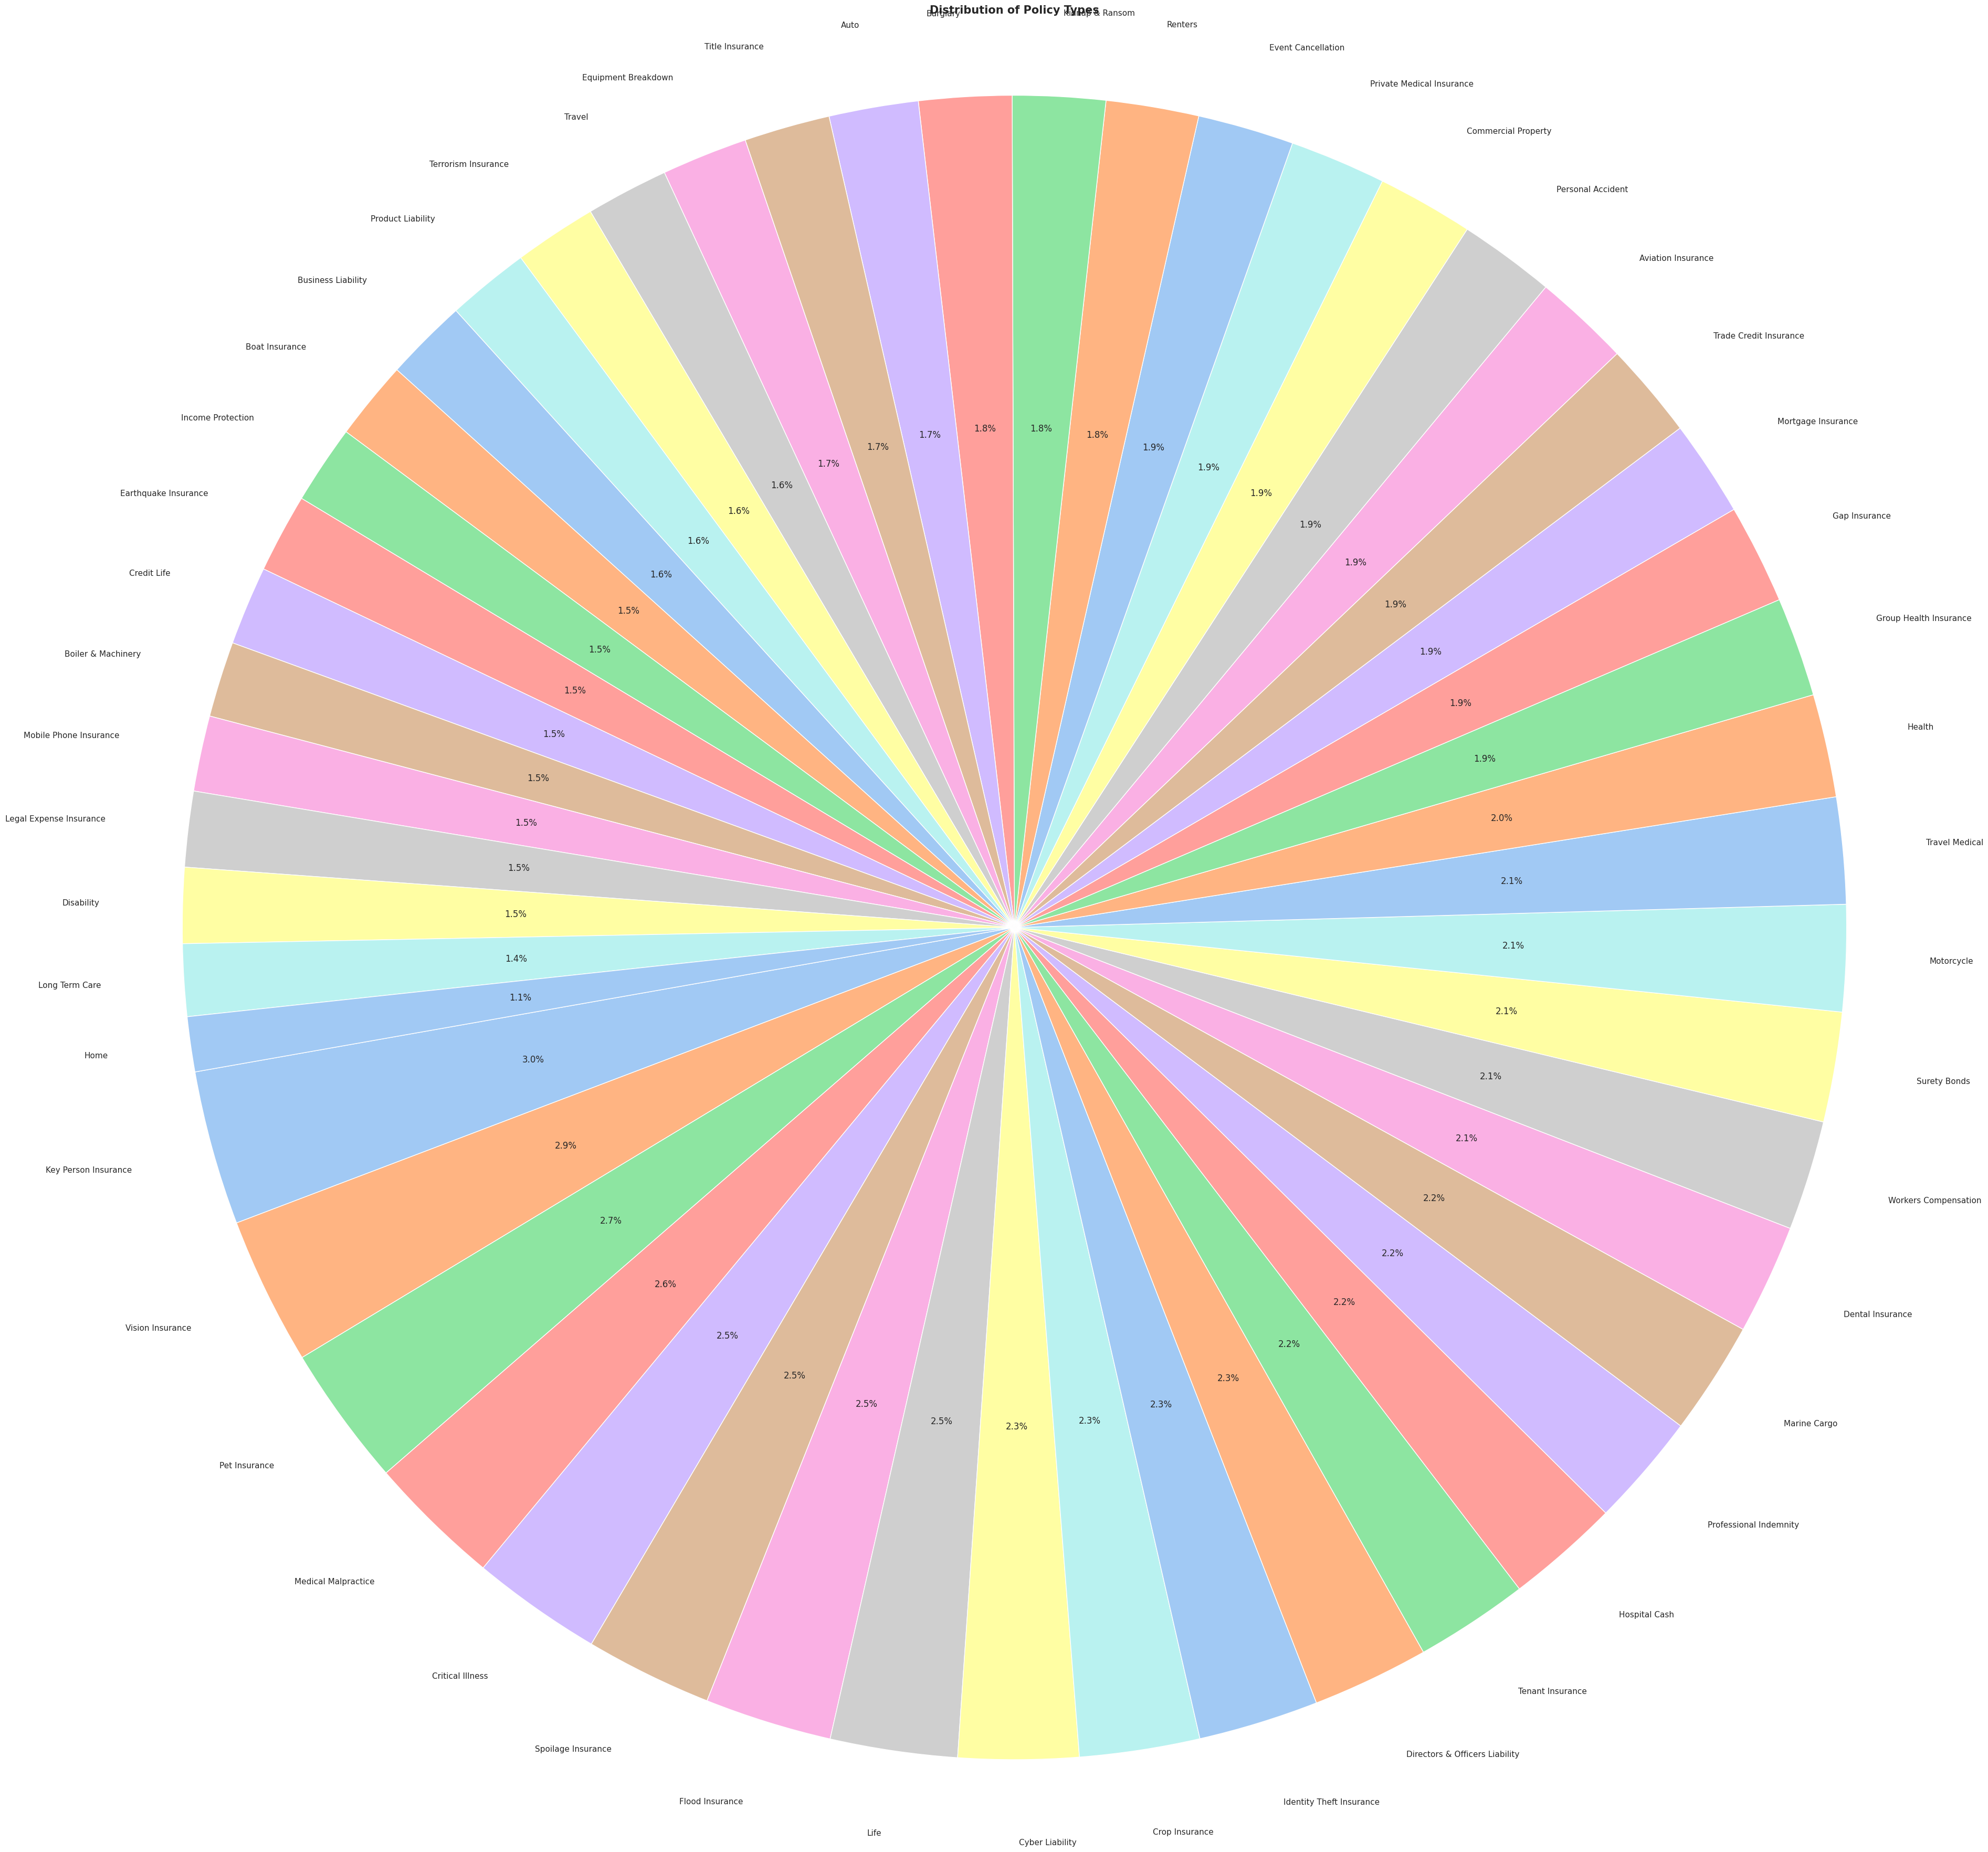

In [54]:
plt.figure(figsize=(45, 45))
policy_counts = claims_df['policy_type'].value_counts()
plt.pie(policy_counts, labels=policy_counts.index, autopct='%2.1f%%', startangle=190, colors=sns.color_palette('pastel'))
plt.title("Distribution of Policy Types", fontsize=15, weight='bold')
plt.axis('equal')
plt.show()


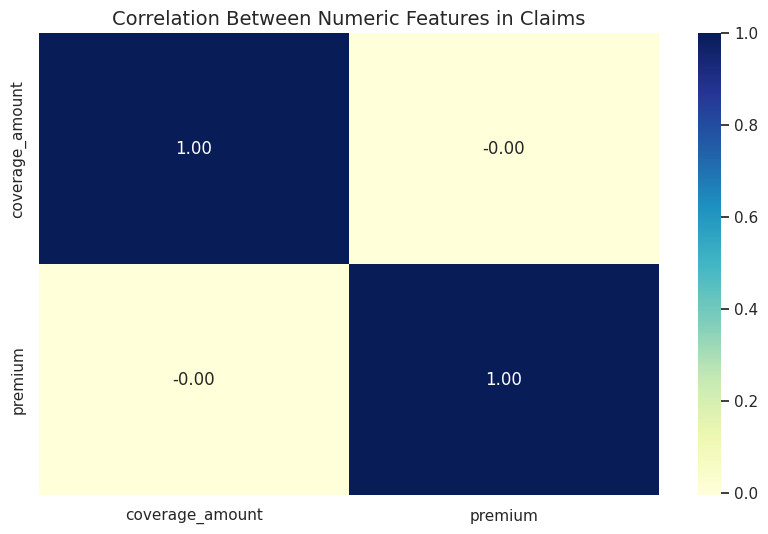

In [55]:
plt.figure(figsize=(10, 6))
numerical_cols = ['coverage_amount', 'premium']
sns.heatmap(claims_df[numerical_cols].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Numeric Features in Claims", fontsize=14)
plt.show()


<ipython-input-56-780c96988833>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='coolwarm')


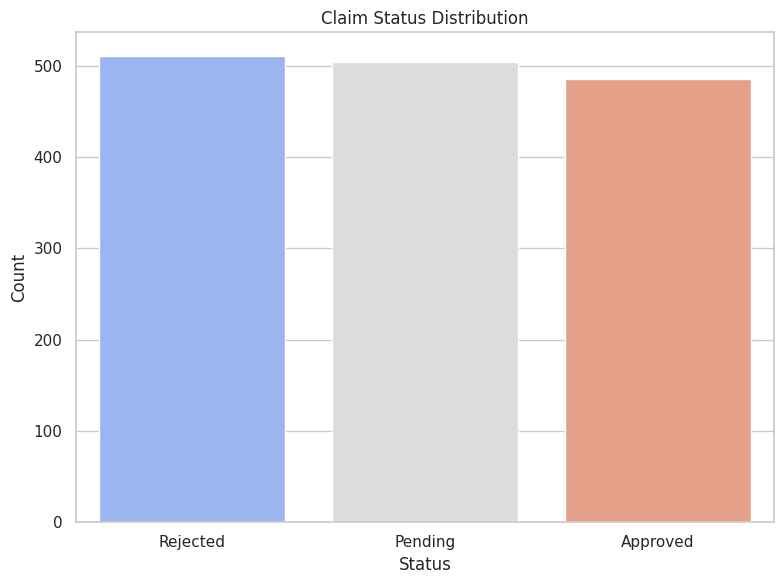

In [56]:
plt.figure(figsize=(8, 6))
status_counts = policies_df['status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette='coolwarm')
plt.title("Claim Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


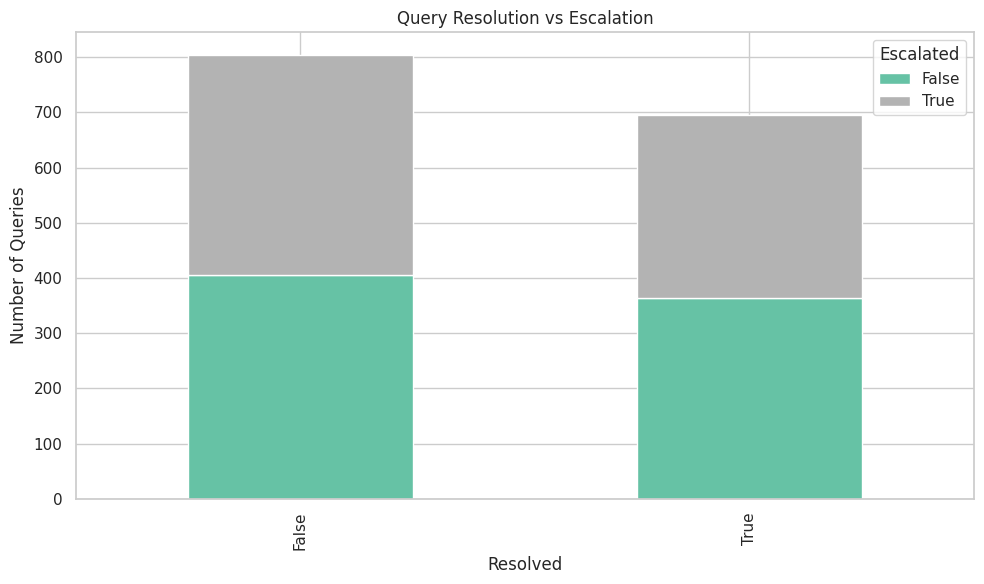

In [57]:
resolved_counts = queries_df.groupby(['resolved', 'escalated']).size().unstack(fill_value=0)

resolved_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Query Resolution vs Escalation")
plt.xlabel("Resolved")
plt.ylabel("Number of Queries")
plt.legend(title="Escalated")
plt.tight_layout()
plt.show()


<ipython-input-58-f5b34b651f96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='mako')


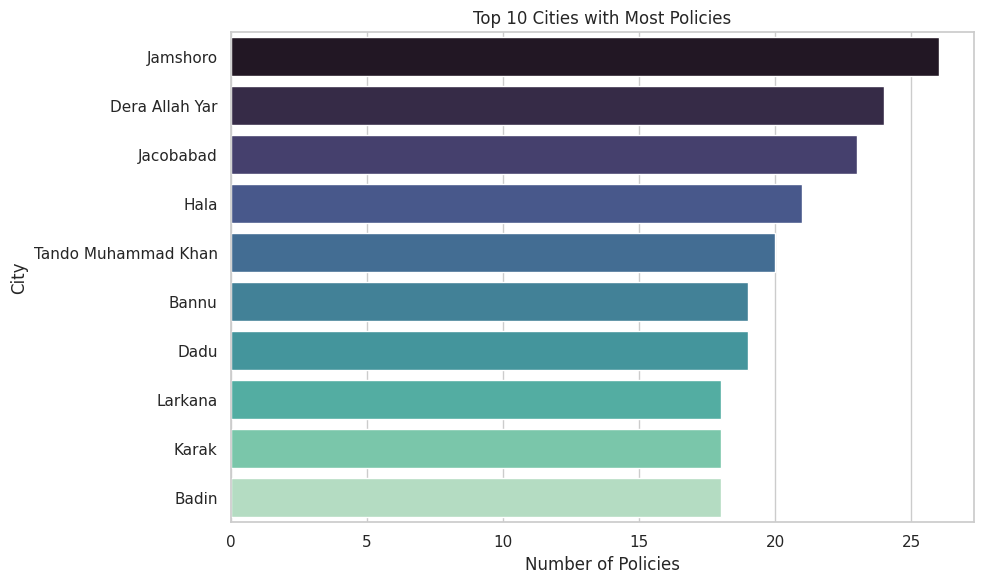

In [58]:
plt.figure(figsize=(10, 6))
top_cities = claims_df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='mako')
plt.title("Top 10 Cities with Most Policies")
plt.xlabel("Number of Policies")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [59]:
plt.figure(figsize=(100, 100))
sns.scatterplot(data=claims_df, x='coverage_amount', y='premium', hue='policy_type', palette='tab10')
plt.title("💰 Coverage vs Premium by Policy Type")
plt.xlabel("Coverage Amount")
plt.ylabel("Premium")
plt.tight_layout()
plt.show()


<ipython-input-59-88dce5d78b9b>:6: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


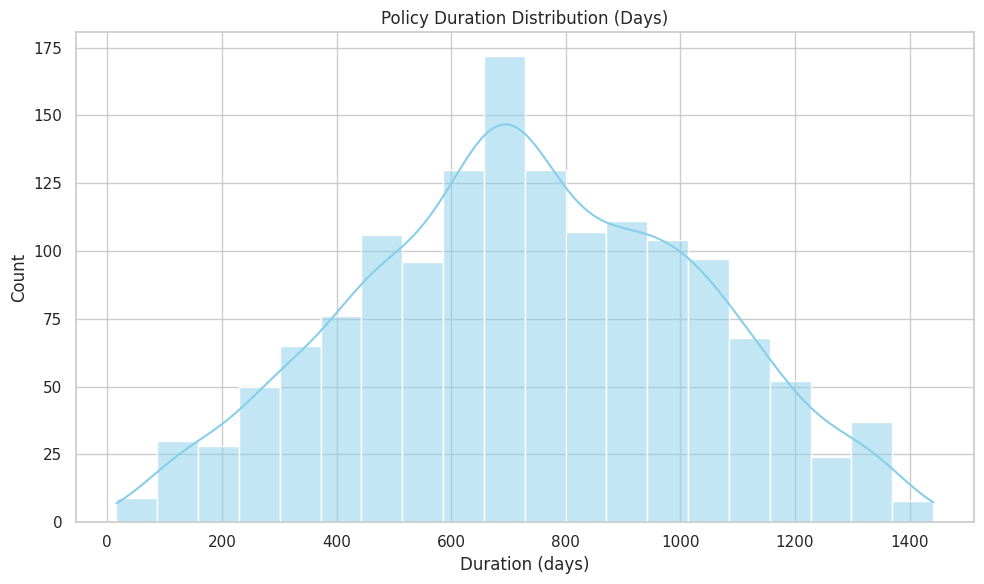

In [60]:
import pandas as pd

claims_df['start_date'] = pd.to_datetime(claims_df['start_date'])
claims_df['end_date'] = pd.to_datetime(claims_df['end_date'])
claims_df['duration_days'] = (claims_df['end_date'] - claims_df['start_date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(claims_df['duration_days'], bins=20, kde=True, color='skyblue')
plt.title("Policy Duration Distribution (Days)")
plt.xlabel("Duration (days)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<ipython-input-61-2c1a9c9468cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='crest')


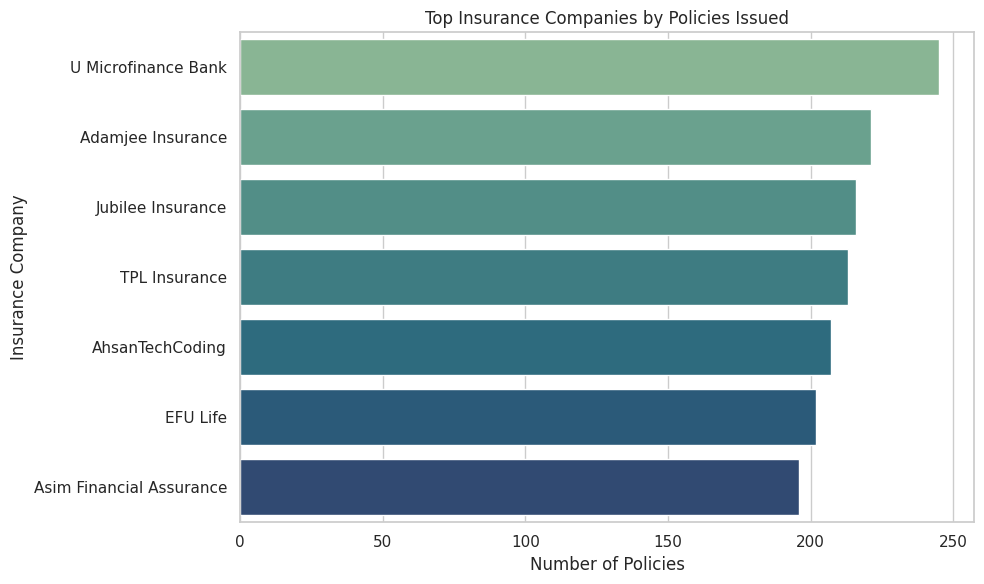

In [61]:
plt.figure(figsize=(10, 6))
top_companies = claims_df['insurance_company'].value_counts()
sns.barplot(x=top_companies.values, y=top_companies.index, palette='crest')
plt.title("Top Insurance Companies by Policies Issued")
plt.xlabel("Number of Policies")
plt.ylabel("Insurance Company")
plt.tight_layout()
plt.show()


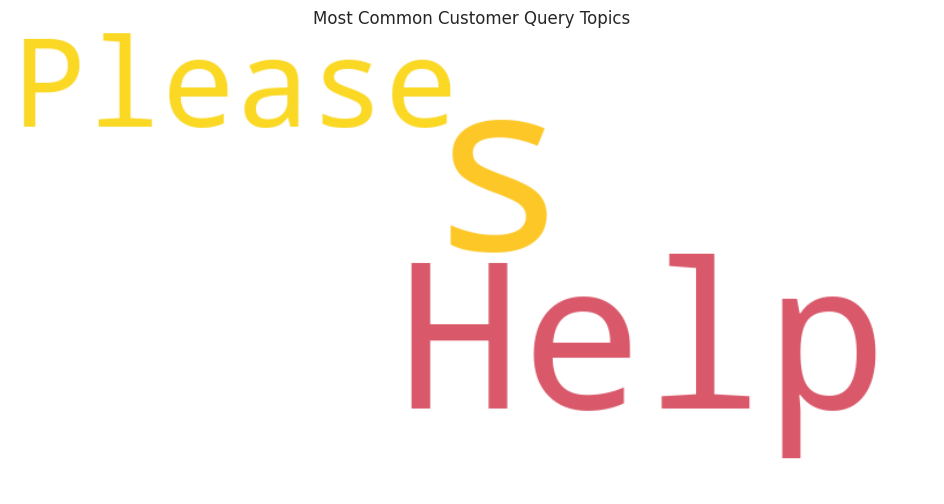

In [62]:
from wordcloud import WordCloud

all_topics = " ".join(queries_df['topic'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(all_topics)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Customer Query Topics")
plt.show()


<ipython-input-63-ab6b24070482>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=policies_df, x='status', y='claim_amount', palette='Set3')


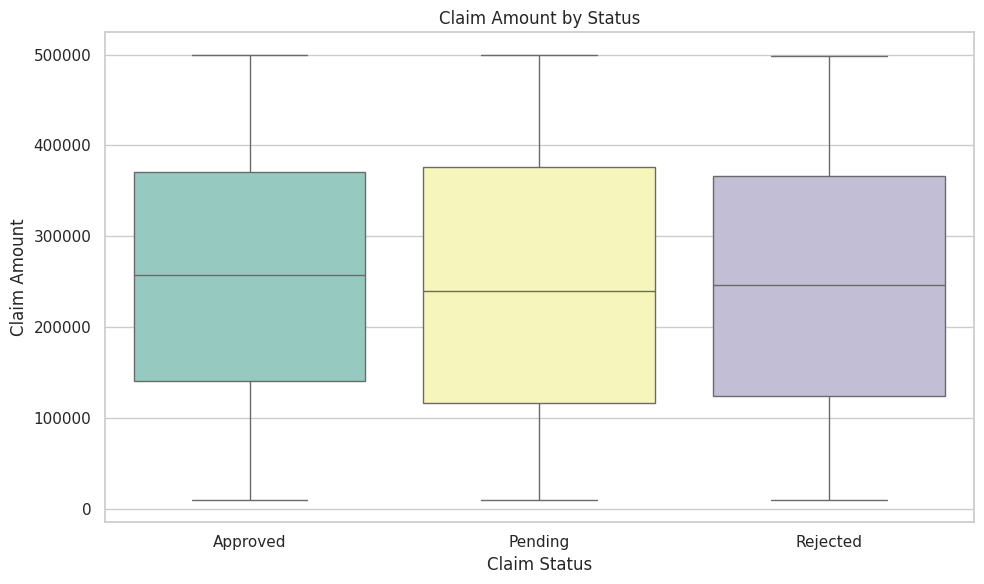

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=policies_df, x='status', y='claim_amount', palette='Set3')
plt.title("Claim Amount by Status")
plt.xlabel("Claim Status")
plt.ylabel("Claim Amount")
plt.tight_layout()
plt.show()


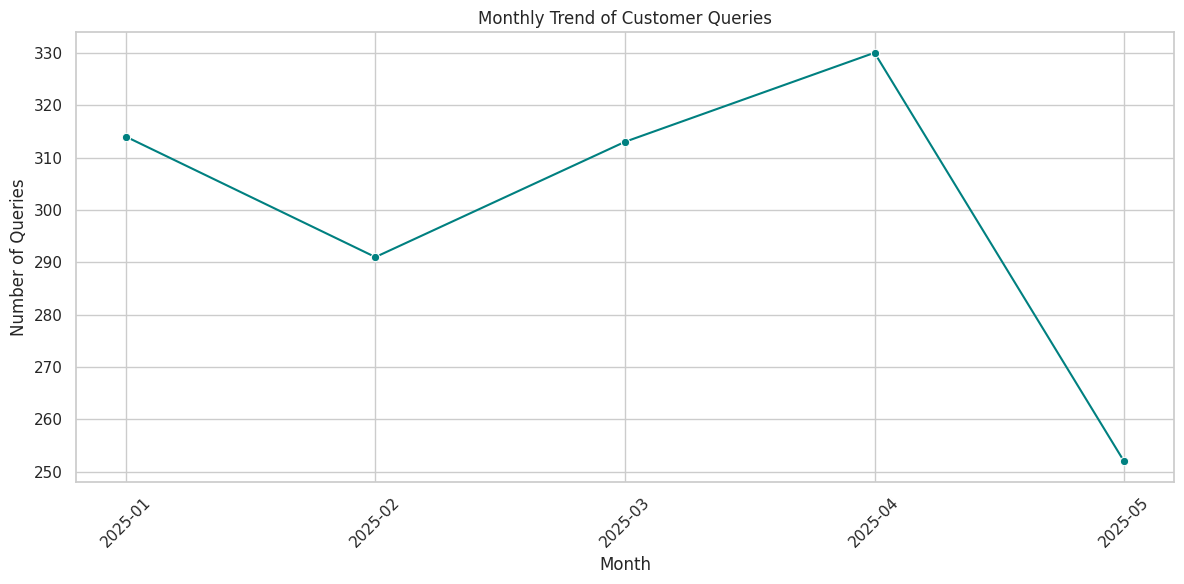

In [64]:
queries_df['query_date'] = pd.to_datetime(queries_df['query_date'])
queries_df['month'] = queries_df['query_date'].dt.to_period('M').astype(str)

monthly_trends = queries_df.groupby('month').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trends.index, y=monthly_trends.values, marker='o', color='teal')
plt.title("Monthly Trend of Customer Queries")
plt.xlabel("Month")
plt.ylabel("Number of Queries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-65-7322f81431c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=esc_topic_counts.values, y=esc_topic_counts.index, palette='flare')


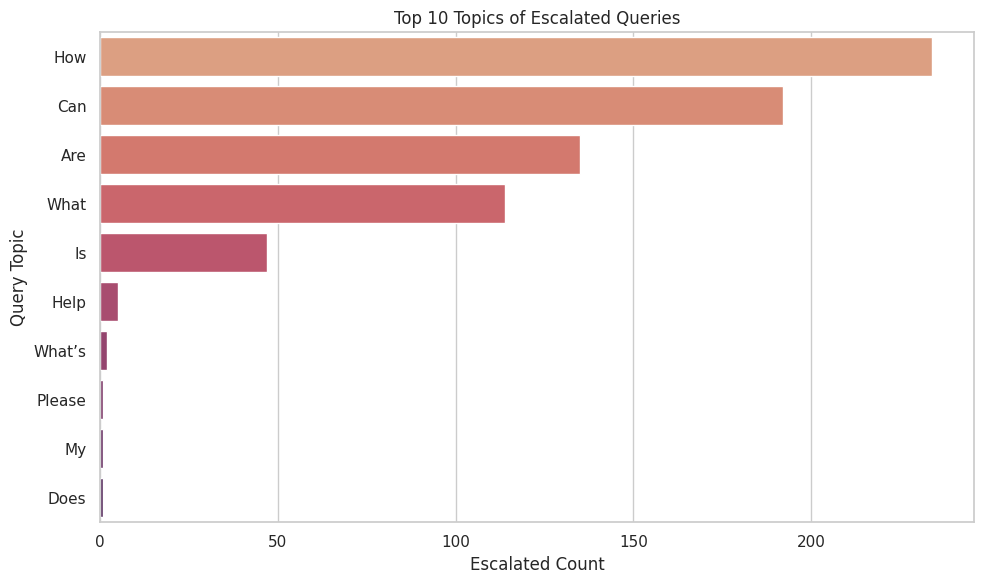

In [65]:
esc_topic_counts = queries_df[queries_df['escalated'] == True]['topic'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=esc_topic_counts.values, y=esc_topic_counts.index, palette='flare')
plt.title("Top 10 Topics of Escalated Queries")
plt.xlabel("Escalated Count")
plt.ylabel("Query Topic")
plt.tight_layout()
plt.show()


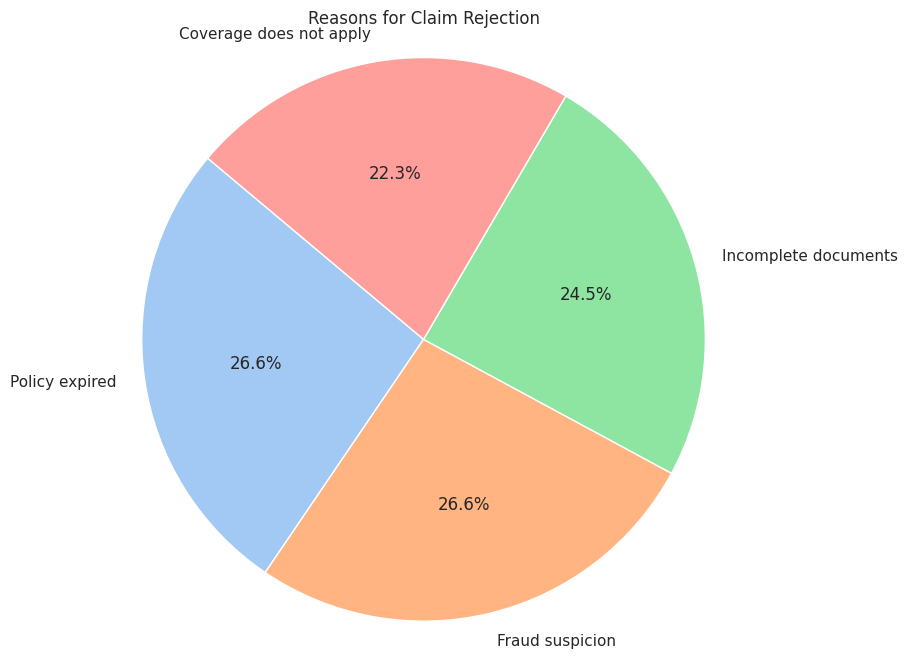

In [66]:
rej_reasons = policies_df[policies_df['status'] == 'Rejected']['rejection_reason'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rej_reasons, labels=rej_reasons.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Reasons for Claim Rejection")
plt.axis('equal')
plt.show()


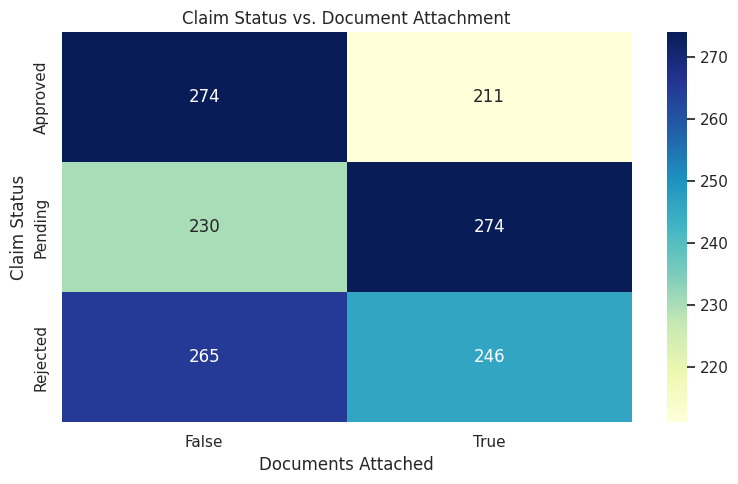

In [67]:
plt.figure(figsize=(8, 5))
heat_data = pd.crosstab(policies_df['status'], policies_df['documents_attached'])
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Claim Status vs. Document Attachment")
plt.xlabel("Documents Attached")
plt.ylabel("Claim Status")
plt.tight_layout()
plt.show()


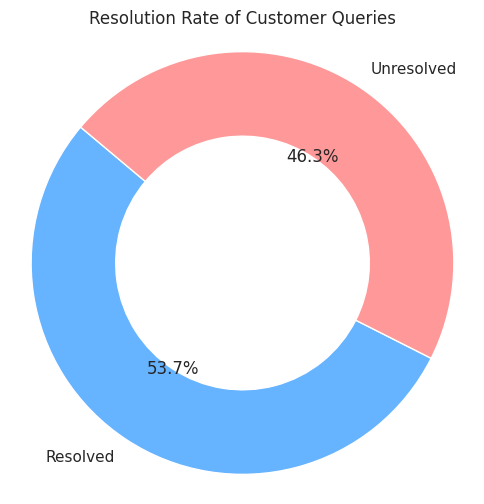

In [68]:
resolved_counts = queries_df['resolved'].value_counts()
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(resolved_counts, labels=['Resolved', 'Unresolved'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'width':0.4})
plt.title("Resolution Rate of Customer Queries")
plt.axis('equal')
plt.show()


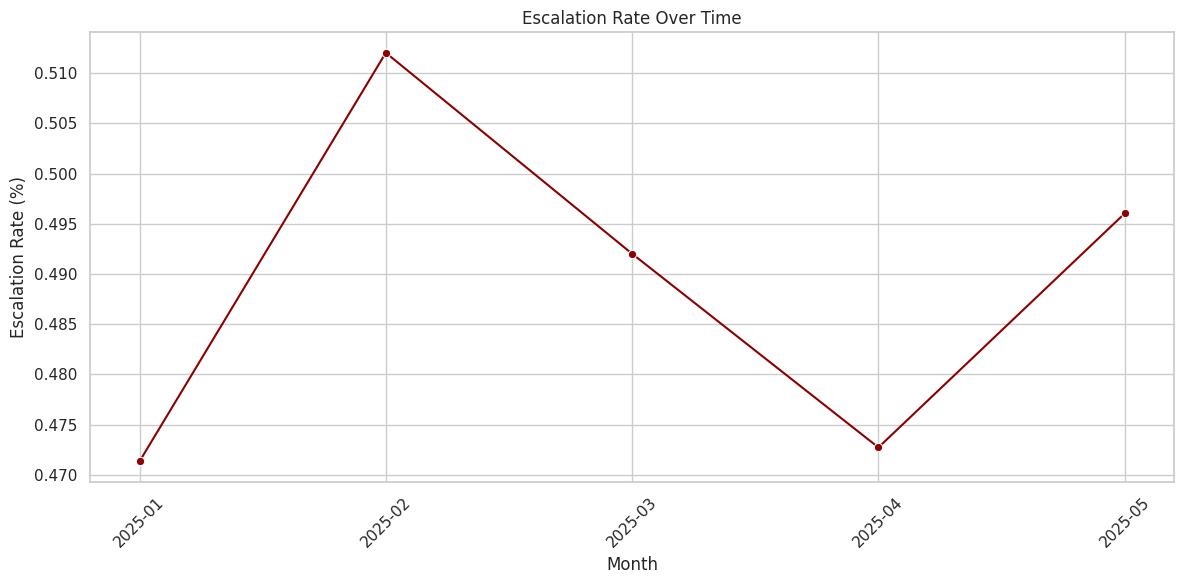

In [69]:
queries_df['month'] = queries_df['query_date'].dt.to_period('M').astype(str)
monthly_escalation = queries_df.groupby('month')['escalated'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_escalation.index, y=monthly_escalation.values, marker='o', color='darkred')
plt.title("Escalation Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Escalation Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


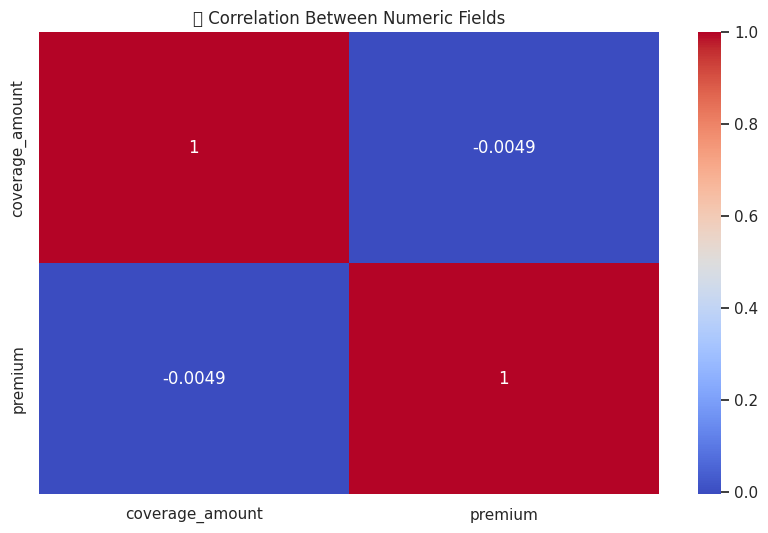

In [70]:
plt.figure(figsize=(10, 6))
numeric_data = claims_df[['coverage_amount', 'premium']]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("🔢 Correlation Between Numeric Fields")
plt.show()


<ipython-input-71-de57d1cf9c74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=queries_df, x='day_of_week', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="muted")


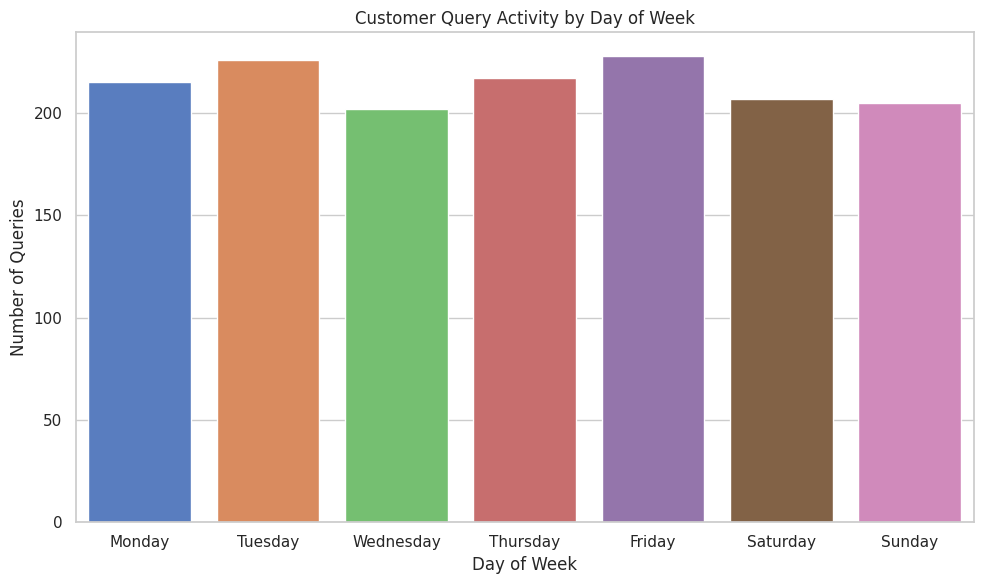

In [71]:
queries_df['day_of_week'] = queries_df['query_date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=queries_df, x='day_of_week', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="muted")
plt.title("Customer Query Activity by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Queries")
plt.tight_layout()
plt.show()


<ipython-input-72-768ae879f33d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.values, y=top_reasons.index, palette="coolwarm")


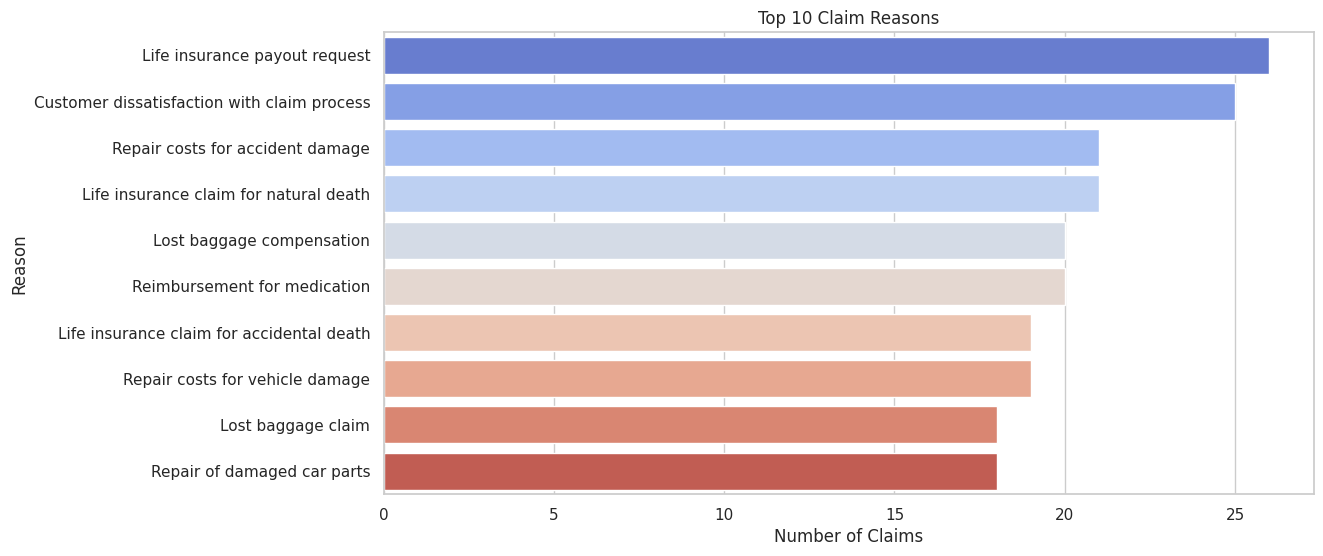

In [72]:
plt.figure(figsize=(12, 6))
top_reasons = policies_df['claim_reason'].value_counts().head(10)
sns.barplot(x=top_reasons.values, y=top_reasons.index, palette="coolwarm")
plt.title("Top 10 Claim Reasons")
plt.xlabel("Number of Claims")
plt.ylabel("Reason")
plt.show()


<ipython-input-73-142f54167178>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = queries_df.resample('M', on='query_date').size()


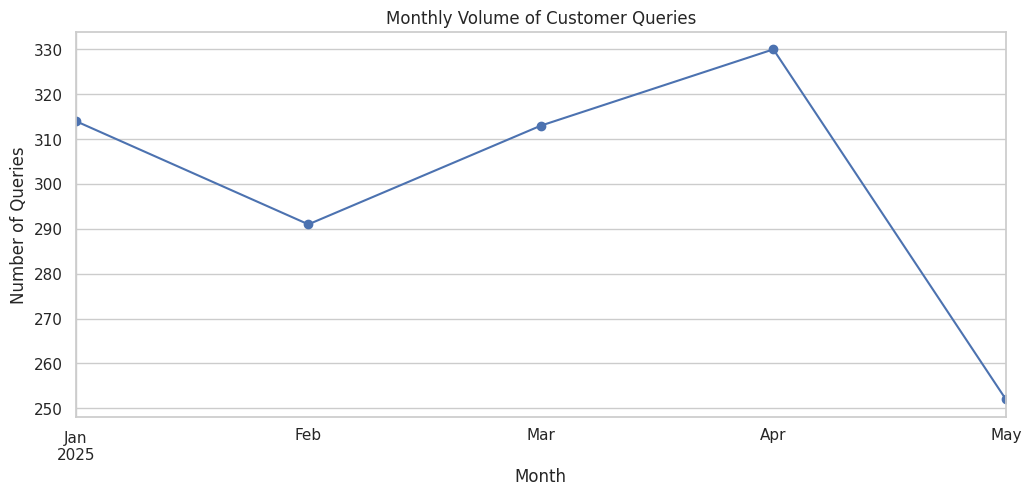

In [73]:
queries_df['query_date'] = pd.to_datetime(queries_df['query_date'])
monthly_trend = queries_df.resample('M', on='query_date').size()

plt.figure(figsize=(12, 5))
monthly_trend.plot(marker='o')
plt.title("Monthly Volume of Customer Queries")
plt.xlabel("Month")
plt.ylabel("Number of Queries")
plt.grid(True)
plt.show()


<ipython-input-74-decb5bd09bf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rejections, y='rejection_reason', palette='cool')


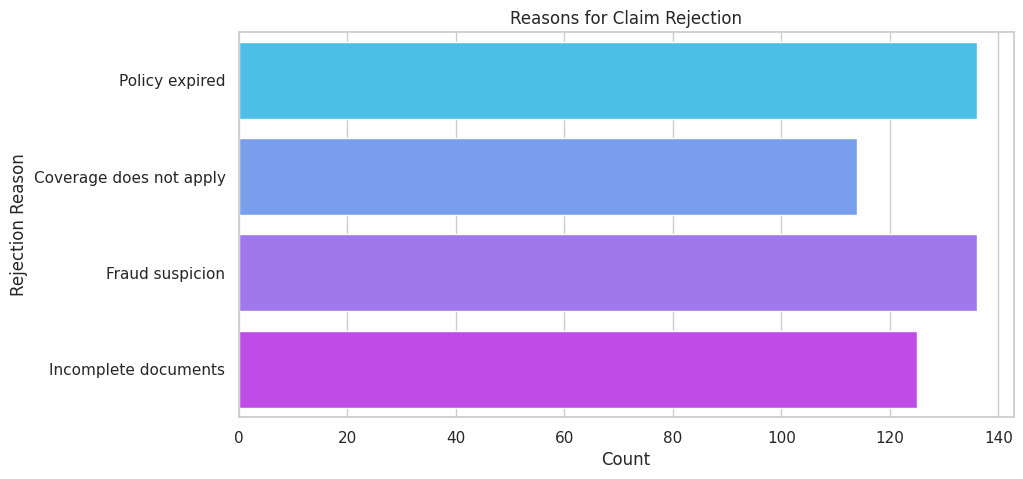

In [74]:
plt.figure(figsize=(10, 5))
rejections = policies_df[policies_df['status'] == 'Rejected']
sns.countplot(data=rejections, y='rejection_reason', palette='cool')
plt.title("Reasons for Claim Rejection")
plt.xlabel("Count")
plt.ylabel("Rejection Reason")
plt.show()


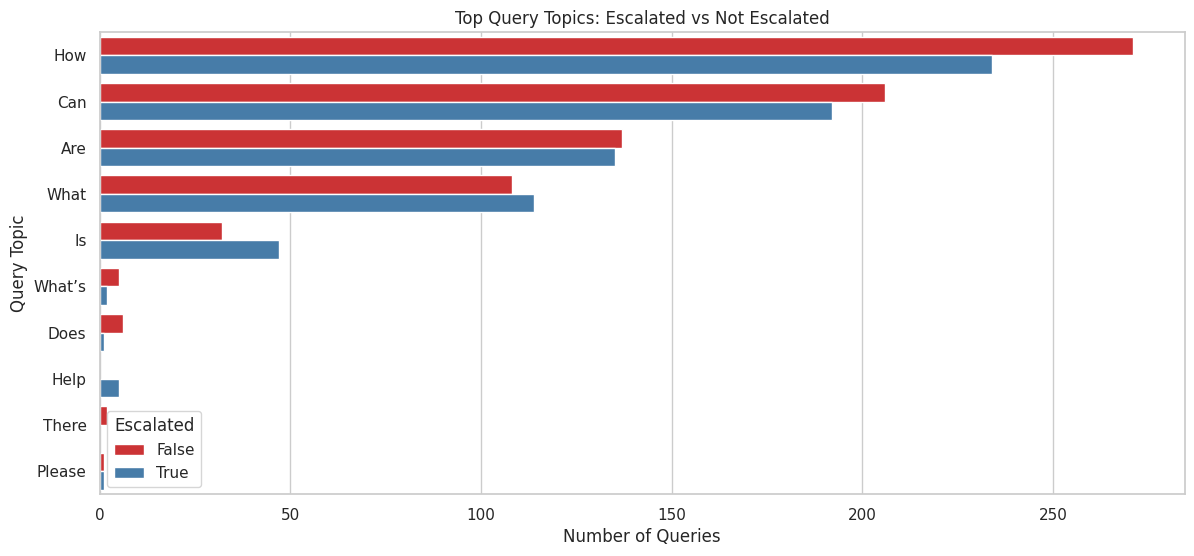

In [75]:
plt.figure(figsize=(14, 6))
sns.countplot(data=queries_df, y='topic', hue='escalated', palette='Set1', order=queries_df['topic'].value_counts().index[:10])
plt.title("Top Query Topics: Escalated vs Not Escalated")
plt.xlabel("Number of Queries")
plt.ylabel("Query Topic")
plt.legend(title="Escalated")
plt.show()


In [76]:
from textblob import TextBlob
import pandas as pd

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.2:
        return "Positive"
    elif polarity < -0.2:
        return "Negative"
    else:
        return "Neutral"

queries_df = queries_df.dropna(subset=['message'])
queries_df['sentiment'] = queries_df['message'].apply(get_sentiment)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [97]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Train set class distribution:", dict(zip(label_encoder.inverse_transform(unique), counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("Test set class distribution:", dict(zip(label_encoder.inverse_transform(unique), counts)))


Train set class distribution: {'Negative': np.int64(3), 'Neutral': np.int64(969), 'Positive': np.int64(228)}
Test set class distribution: {'Negative': np.int64(1), 'Neutral': np.int64(242), 'Positive': np.int64(57)}


In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming queries_df has 'message' and 'sentiment' columns
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(queries_df['sentiment'])

vocab_size = 10000
max_len = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(queries_df['message'])
X = tokenizer.texts_to_sequences(queries_df['message'])
X = pad_sequences(X, maxlen=max_len, padding='post')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

embedding_dim = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Save the model to a file
model.save('/content/drive/MyDrive/sentiment_lstm_model.h5')
print("Model saved to sentiment_lstm_model.h5")

# Later, you can load the model back like this:
# loaded_model = load_model('sentiment_lstm_model.h5')
# loaded_model.evaluate(X_test, y_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.7521 - loss: 0.7615 - val_accuracy: 0.8125 - val_loss: 0.5034
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.8246 - loss: 0.5214 - val_accuracy: 0.8125 - val_loss: 0.5076
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.8077 - loss: 0.5306 - val_accuracy: 0.8125 - val_loss: 0.5039
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7899 - loss: 0.5370 - val_accuracy: 0.8125 - val_loss: 0.5104
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8244 - loss: 0.4822 - val_accuracy: 0.8125 - val_loss: 0.5041
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7818 - loss: 0.5305


Test Loss: 0.5149
Test Accuracy: 0.7933
Model saved to sentiment_lstm_model.h5


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Define CNN model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

cnn_model.summary()

# Train the model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'CNN Test Loss: {loss:.4f}')
print(f'CNN Test Accuracy: {accuracy:.4f}')

# Save the CNN model
cnn_model.save('/content/drive/MyDrive/sentiment_cnn_model.h5')
print("CNN model saved to sentiment_cnn_model.h5")


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.6599 - loss: 0.8658 - val_accuracy: 0.8125 - val_loss: 0.4502
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8424 - loss: 0.4067 - val_accuracy: 0.9458 - val_loss: 0.1920
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9681 - loss: 0.1742 - val_accuracy: 0.9708 - val_loss: 0.1149
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9729 - loss: 0.1164 - val_accuracy: 0.9750 - val_loss: 0.0940
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9820 - loss: 0.1044 - val_accuracy: 0.9750 - val_loss: 0.0767
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9576 - loss: 0.1368


CNN Test Loss: 0.1204
CNN Test Accuracy: 0.9633
CNN model saved to sentiment_cnn_model.h5


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Define BiLSTM model
bilstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

bilstm_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

bilstm_model.summary()

# Train the model
bilstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = bilstm_model.evaluate(X_test, y_test)
print(f'BiLSTM Test Loss: {loss:.4f}')
print(f'BiLSTM Test Accuracy: {accuracy:.4f}')

# Save the model
bilstm_model.save('/content/drive/MyDrive/sentiment_bilstm_model.h5')
print("BiLSTM model saved to sentiment_bilstm_model.h5")


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.7316 - loss: 0.7985 - val_accuracy: 0.8125 - val_loss: 0.4983
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.8041 - loss: 0.5016 - val_accuracy: 0.8792 - val_loss: 0.3635
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.9129 - loss: 0.2561 - val_accuracy: 0.9583 - val_loss: 0.1432
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.9752 - loss: 0.0998 - val_accuracy: 0.9583 - val_loss: 0.1234
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9901 - loss: 0.0573 - val_accuracy: 0.9667 - val_loss: 0.0922
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9724 - loss: 0.1234


BiLSTM Test Loss: 0.1159
BiLSTM Test Accuracy: 0.9667
BiLSTM model saved to sentiment_bilstm_model.h5


array([[  8,   2,  33, ...,   0,   0,   0],
       [ 10,  11,   2, ...,   0,   0,   0],
       [ 10,  11,   2, ...,   0,   0,   0],
       ...,
       [  8,   2,  35, ...,   0,   0,   0],
       [ 17, 117, 107, ...,   0,   0,   0],
       [  7,  98, 121, ...,   0,   0,   0]], dtype=int32)

In [88]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on test set
y_pred_probs = model_lstm.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Define expected class indices (e.g., 0 = negative, 1 = neutral, 2 = positive)
expected_classes = [0, 1, 2]  # or sorted(np.unique(y)) if dynamic

# Define class names from label_encoder
target_names = label_encoder.inverse_transform(expected_classes)

# Generate classification report with all labels
print(classification_report(y_test, y_pred, labels=expected_classes, target_names=target_names))


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.79      1.00      0.88       238
    Positive       0.00      0.00      0.00        62

    accuracy                           0.79       300
   macro avg       0.26      0.33      0.29       300
weighted avg       0.63      0.79      0.70       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

{'Negative': np.int64(4), 'Neutral': np.int64(973), 'Positive': np.int64(223)}


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.1206 - loss: 0.9066 - val_accuracy: 0.8125 - val_loss: 1.0151
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.3674 - loss: 1.3292 - val_accuracy: 0.0042 - val_loss: 1.1561
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.1141 - loss: 1.1797 - val_accuracy: 0.0042 - val_loss: 1.0970
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6524 - loss: 1.0314 - val_accuracy: 0.1833 - val_loss: 1.0645
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.4621 - loss: 1.1489 - val_accuracy: 0.1833 - val_loss: 1.0237


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00       238
    Positive       0.21      1.00      0.34        62

    accuracy                           0.21       300
   macro avg       0.07      0.33      0.11       300
weighted avg       0.04      0.21      0.07       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me